# MÉS ENLLÀ DELS PODERS: ANÀLISI ESTADÍSTICA DE L'UNIVERS DELS SUPERHEROIS


AUTOR: MARCO ANTONIO GILES LÓPEZ

TUTOR: JOAN GASULL JOLÍS

14 de juny del 2024 

#### IMPORTACIÓ DE TOTES LES LLIBRERIES NECESSÀRIES PER L'ESTUDI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


#### IMPORTACIÓ DE DADES I ELIMINACIÓ DE DUPLICATS

In [2]:

datos = pd.read_csv("C:/Users/manonio/Desktop/ESTADISTICA APLICADA/TFG/superheroes2.csv")


datos = datos.applymap(lambda x: np.nan if x is None else x)

print(datos.shape[0])
print(datos.shape[1])

datos = datos.drop_duplicates()


print(datos.shape[0])
print(datos.shape[1])


C:\Users\manonio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,8,16,17,19,23,24,25,27,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


28118
39
24669
39


In [3]:
28118-24669


3449

In [4]:
datos.head(30)

,Alignment,Alter_Egos,Base,Character,Class_value,Collections,Combat,Creator,Durability,Equipment,...,Species,Speed,Speed_velocity,Strength,Strength_force,Super_powers,Tier,Universe,Weight,History
0,Good,NaN,NaN,Alucard,5471,NaN,80,Konami,35,NaN,...,Human,30,2000,30,100000,"Accelerated Healing,Agility,Berserk Mode,Blood...",2,C17S,82 kg • 180.78 lbs,NaN
1,Good,NaN,NaN,Alucard,5876,NaN,80,Konami,35,NaN,...,Human,30,2000,30,100000,"Accelerated Healing,Agility,Berserk Mode,Blood...",2,C17S,82 kg • 180.78 lbs,NaN
2,Good,NaN,NaN,Alucard,2.58601e+06,NaN,90,Konami,100,NaN,...,Vampire,100,1000000000,100,1000000000,"Accelerated Healing,Acrobatics,Agility,Blood M...",7,Castlevania,-,NaN
3,Good,NaN,NaN,Alucard,3.3801e+06,NaN,90,Konami,100,NaN,...,Vampire,100,1000000000,100,1000000000,"Accelerated Healing,Acrobatics,Agility,Blood M...",7,Castlevania,-,NaN
4,Good,NaN,NaN,Alucard,1170,NaN,100,NaN,45,NaN,...,NaN,50,10000,50,400000,"Accelerated Healing,Acrobatics,Agility,Berserk...",2,ML,-,NaN
5,Good,NaN,NaN,Alucard,1362,NaN,100,NaN,45,NaN,...,NaN,50,10000,50,400000,"Accelerated Healing,Acrobatics,Agility,Berserk...",2,ML,-,NaN
6,Neutral,NaN,NaN,Bayonetta,100627,"Anti-heroes,Gamekings,Roleplaying Collection,V...",90,Sega,75,Umbran Armor,...,Human,50,2997925,55,1000000,"Agility,Chain Manipulation,Durability,Energy A...",4,Bayonetta,90.7 kg • 199.96 lbs,NaN
7,Neutral,"Bayonetta,Bayonetta,Bayonetta,Bayonetta,Bayonetta",NaN,Bayonetta,171876,"Anti-heroes,Characters With Yellow Rating,Deat...",90,Sega,75,"Umbran Armor,Eyes Of The World",...,Human,50,2997925,55,1000000,"Agility,Chain Manipulation,Durability,Energy A...",4,Bayonetta,90.7 kg • 199.96 lbs,NaN
8,Good,NaN,NaN,Adam,40,NaN,40,NaN,15,NaN,...,Human,10,18,25,8000,"Acrobatics,Agility,Durability,Jump,Stamina,Sup...",1,The Hollow,-,NaN
9,Good,NaN,NaN,Adam,44,NaN,40,NaN,15,NaN,...,Human,10,18,25,8000,"Acrobatics,Agility,Durability,Jump,Stamina,Sup...",1,The Hollow,-,NaN


### PREPROCESSAMENT DE LES DADES I ANÀLISI DESCRIPTIVA

In [5]:
print(datos.dtypes)

Alignment         object
Alter_Egos        object
Base              object
Character         object
Class_value       object
Collections       object
Combat            object
Creator           object
Durability        object
Equipment         object
Eye_color         object
Formerly          object
Full_name         object
Gender            object
Hair_color        object
Height            object
IQ                object
Intelligence      object
Leader            object
Level             object
Member            object
Name              object
Occupation        object
Omnipotent        object
Omnipresent       object
Omniscient        object
Place_of_birth    object
Power             object
Relatives         object
Species           object
Speed             object
Speed_velocity    object
Strength          object
Strength_force    object
Super_powers      object
Tier              object
Universe          object
Weight            object
History           object
dtype: object


In [6]:
columnas_cate = ['Alignment', 'Alter_Egos' ,'Base', 'Character', 'Collections', 'Creator', 'Equipment', 'Eye_color', 'Formerly', 'Full_name', 'Gender', 'Hair_color', 'Height', 'Place_of_birth', 'Relatives', 'Species', 'Super_powers', 'Universe', 'Leader', 'Member', 'Name', 'Occupation', 'Weight','History']


datos[columnas_cate] = datos[columnas_cate].astype('category')

columnas_num = ['Class_value', 'Combat', 'Durability', 'IQ', 'Intelligence', 'Level', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Power', 'Speed', 'Speed_velocity', 'Strength', 'Strength_force', 'Tier']

datos[columnas_num] = datos[columnas_num].apply(pd.to_numeric, errors='coerce')


In [7]:
print(datos.dtypes)

Alignment         category
Alter_Egos        category
Base              category
Character         category
Class_value        float64
Collections       category
Combat             float64
Creator           category
Durability         float64
Equipment         category
Eye_color         category
Formerly          category
Full_name         category
Gender            category
Hair_color        category
Height            category
IQ                 float64
Intelligence       float64
Leader            category
Level              float64
Member            category
Name              category
Occupation        category
Omnipotent         float64
Omnipresent        float64
Omniscient         float64
Place_of_birth    category
Power              float64
Relatives         category
Species           category
Speed              float64
Speed_velocity     float64
Strength           float64
Strength_force     float64
Super_powers      category
Tier               float64
Universe          category
W

In [8]:
print(datos.isna().sum())

Alignment          6145
Alter_Egos        21593
Base              19222
Character             0
Class_value         179
Collections       16763
Combat              179
Creator            4032
Durability          179
Equipment         23185
Eye_color          6690
Formerly          23366
Full_name         20263
Gender             6340
Hair_color         6796
Height              178
IQ                  179
Intelligence        179
Leader            24215
Level               179
Member            23366
Name               7537
Occupation        15228
Omnipotent          179
Omnipresent         179
Omniscient          179
Place_of_birth    19081
Power               179
Relatives         17779
Species            9380
Speed               179
Speed_velocity      179
Strength            179
Strength_force      179
Super_powers       3142
Tier                179
Universe           2884
Weight              178
History           18539
dtype: int64


In [9]:
datos = datos.drop(columns=['Alter_Egos','Equipment','Leader','Formerly','History','Base','Collections','Full_name','Member','Name','Occupation','Place_of_birth', 'Relatives','History'])

In [10]:
print(datos.isna().sum())

Alignment         6145
Character            0
Class_value        179
Combat             179
Creator           4032
Durability         179
Eye_color         6690
Gender            6340
Hair_color        6796
Height             178
IQ                 179
Intelligence       179
Level              179
Omnipotent         179
Omnipresent        179
Omniscient         179
Power              179
Species           9380
Speed              179
Speed_velocity     179
Strength           179
Strength_force     179
Super_powers      3142
Tier               179
Universe          2884
Weight             178
dtype: int64


IMPUTACIÓN

In [11]:
def contar_GUIONES(df):
   
    guiones_counts = {} 
    for columna in df.columns:
        guiones_counts[columna] = (df[columna] == "-").sum()  
    
    return guiones_counts

print(contar_GUIONES(datos))

{'Alignment': 965, 'Character': 0, 'Class_value': 0, 'Combat': 0, 'Creator': 0, 'Durability': 0, 'Eye_color': 4251, 'Gender': 1018, 'Hair_color': 3865, 'Height': 17125, 'IQ': 0, 'Intelligence': 0, 'Level': 0, 'Omnipotent': 0, 'Omnipresent': 0, 'Omniscient': 0, 'Power': 0, 'Species': 0, 'Speed': 0, 'Speed_velocity': 0, 'Strength': 0, 'Strength_force': 0, 'Super_powers': 0, 'Tier': 0, 'Universe': 0, 'Weight': 18761}


In [12]:
datos = datos.drop(columns=['Height','Weight','Eye_color','Hair_color'])

In [13]:
print(datos.isna().sum())

Alignment         6145
Character            0
Class_value        179
Combat             179
Creator           4032
Durability         179
Gender            6340
IQ                 179
Intelligence       179
Level              179
Omnipotent         179
Omnipresent        179
Omniscient         179
Power              179
Species           9380
Speed              179
Speed_velocity     179
Strength           179
Strength_force     179
Super_powers      3142
Tier               179
Universe          2884
dtype: int64


In [14]:
datos['Alignment'].value_counts()

Good         9244
Bad          5729
Neutral      2585
-             965
Alignment       1
Name: Alignment, dtype: int64

In [15]:
categorias_validas = ['Neutral', 'Good', 'Bad']

datos['Alignment'] = datos['Alignment'].apply(lambda x: x if x in categorias_validas else 'Neutral')


In [16]:
datos['Alignment'].value_counts()


Good       9244
Bad        5729
Neutral    3551
Name: Alignment, dtype: int64

In [17]:
datos['Alignment'].isna().sum()

6145

In [18]:
datos['Character'].value_counts()

Green Lantern        90
Batman               85
Superman             61
Thor                 45
Spider-Man           44
                     ..
Illidan Stormrage     1
Ikkaku                1
Ibuki Mioda           1
Ibiki Morino          1
#1                    1
Name: Character, Length: 11262, dtype: int64

In [19]:
datos['Class_value'].describe()

count    2.449000e+04
mean     1.087221e+11
std      1.713258e+12
min      0.000000e+00
25%      1.290000e+02
50%      1.678000e+03
75%      2.294550e+05
max      4.677292e+13
Name: Class_value, dtype: float64

In [20]:
datos['Combat'].describe()

count    24490.000000
mean        66.306697
std         28.550956
min          0.000000
25%         45.000000
50%         70.000000
75%         90.000000
max        100.000000
Name: Combat, dtype: float64

In [21]:
datos['Creator'].value_counts()

categorias_validas = ['Marvel Comics', 'Other', 'DC Comics','Shueisha', 'Nintendo', 'None']


datos['Creator'] = datos['Creator'].apply(lambda x: x if x in categorias_validas else 'Other')

In [22]:
datos['Creator'].value_counts()


Other            9034
Marvel Comics    4411
DC Comics        3851
Shueisha         2717
Nintendo          624
Name: Creator, dtype: int64

In [23]:
datos['Durability'].describe()

count    24490.000000
mean        49.541650
std         35.847303
min          0.000000
25%         15.000000
50%         40.000000
75%         95.000000
max        100.000000
Name: Durability, dtype: float64

In [24]:
datos['Gender'].value_counts()

Male      12287
Female     4552
-          1018
Other       471
Gender        1
Name: Gender, dtype: int64

In [25]:
categorias_validas = ['None', 'Male', 'Female']

datos['Gender'] = datos['Gender'].apply(lambda x: x if x in categorias_validas else 'None')

datos['Gender'].value_counts()

Male      12287
Female     4552
None       1490
Name: Gender, dtype: int64

In [26]:
datos['IQ'].describe()

count    24490.000000
mean       141.423887
std         37.620174
min          0.000000
25%        115.000000
50%        140.000000
75%        170.000000
max        200.000000
Name: IQ, dtype: float64

In [27]:
datos['Intelligence'].describe()

count    24490.000000
mean        70.890282
std         18.763994
min          0.000000
25%         60.000000
50%         70.000000
75%         85.000000
max        100.000000
Name: Intelligence, dtype: float64

In [28]:
datos = datos.drop(columns=['IQ'])
#elimino IQ porque Intelligence es proporcional

In [29]:
datos['Level'].describe()

count    24490.000000
mean         3.136219
std          1.809562
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Level, dtype: float64

In [30]:
datos['Omnipotent'].value_counts()

0.0    24490
Name: Omnipotent, dtype: int64

In [31]:
datos['Omnipresent'].value_counts()

0.0    23470
1.0     1020
Name: Omnipresent, dtype: int64

In [32]:
datos['Omniscient'].value_counts()

0.0    24133
1.0      357
Name: Omniscient, dtype: int64

In [33]:
datos = datos.drop(columns=['Omniscient','Omnipotent','Omnipresent'])

In [34]:
datos['Power'].describe()

count    24490.000000
mean        60.724010
std         32.758462
min          0.000000
25%         30.000000
50%         60.000000
75%        100.000000
max        100.000000
Name: Power, dtype: float64

In [35]:
datos['Speed'].describe()

count    24490.000000
mean        47.949163
std         38.095949
min          0.000000
25%         14.000000
50%         30.000000
75%        100.000000
max        100.000000
Name: Speed, dtype: float64

In [36]:
datos['Speed_velocity'].describe()

count    2.449000e+04
mean     2.974601e+08
std      4.371053e+08
min      0.000000e+00
25%      2.500000e+01
50%      1.715000e+03
75%      1.000000e+09
max      1.000000e+09
Name: Speed_velocity, dtype: float64

In [37]:
datos['Strength'].describe()

count    24490.000000
mean        49.309392
std         40.309143
min          0.000000
25%          8.000000
50%         30.000000
75%        100.000000
max        100.000000
Name: Strength, dtype: float64

In [38]:
datos['Strength_force'].describe()

count    2.449000e+04
mean     3.244273e+08
std      4.562419e+08
min      0.000000e+00
25%      3.000000e+02
50%      1.000000e+05
75%      1.000000e+09
max      1.000000e+09
Name: Strength_force, dtype: float64

In [39]:
datos['Tier'].describe()

count    24490.000000
mean         3.654267
std          2.779375
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         10.000000
Name: Tier, dtype: float64

In [40]:
datos['Species'].value_counts()

Human            7840
Alien             867
God / Eternal     828
Demon             684
Animal            576
                 ... 
Twi'lek             1
Species             1
Smurf               1
Leprechaun          1
Naltorian           1
Name: Species, Length: 94, dtype: int64

In [41]:
categorias_validas = ['None', 'Human', 'Alien', 'God / Eternal', 'Demon']

datos['Species'] = datos['Species'].apply(lambda x: x if x in categorias_validas else 'Other')



In [42]:
datos['Species'].value_counts()

Human            7840
Other            5070
Alien             867
God / Eternal     828
Demon             684
Name: Species, dtype: int64

In [43]:
datos['Super_powers'].value_counts()

Nigh-Omnipotence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [44]:
datos['Universe'].value_counts()

Earth-616            2342
Prime Earth          1477
DB                    564
MCU                   533
League Of Legends     370
                     ... 
Imaginary Friends       1
Onward                  1
Cknd                    1
Claymore                1
Bombshells              1
Name: Universe, Length: 898, dtype: int64

In [45]:
print(datos.isna().sum())

Alignment         6145
Character            0
Class_value        179
Combat             179
Creator           4032
Durability         179
Gender            6340
Intelligence       179
Level              179
Power              179
Species           9380
Speed              179
Speed_velocity     179
Strength           179
Strength_force     179
Super_powers      3142
Tier               179
Universe          2884
dtype: int64


In [46]:
print(datos.dtypes)

Alignment           object
Character         category
Class_value        float64
Combat             float64
Creator             object
Durability         float64
Gender              object
Intelligence       float64
Level              float64
Power              float64
Species             object
Speed              float64
Speed_velocity     float64
Strength           float64
Strength_force     float64
Super_powers      category
Tier               float64
Universe          category
dtype: object


In [47]:
datos['Alignment'] = datos['Alignment'].astype('category')

In [48]:
datos['Creator'] = datos['Creator'].replace('nan', np.nan)


label_encoder = LabelEncoder()
non_nan_values = datos['Creator'].dropna().unique()
label_encoder.fit(non_nan_values)

datos['Creator_encoded'] = datos['Creator'].apply(lambda x: label_encoder.transform([x])[0] if pd.notna(x) else np.nan)

print("Valores faltantes en 'Creator_encoded' antes de la imputación:")
print(datos['Creator_encoded'].isna().sum())


cols_to_impute = ['Creator_encoded','Class_value', 'Combat', 'Durability', 'Intelligence', 'Level', 'Power', 'Speed', 'Speed_velocity', 'Strength', 'Strength_force']



imputer = KNNImputer(n_neighbors=5)


imputed_data = imputer.fit_transform(datos[cols_to_impute])


datos['Creator'] = label_encoder.inverse_transform(imputed_data[:, 0].round().astype(int))

print(datos['Creator'].value_counts(dropna=False))

print(datos['Creator'].isna().sum())


Valores faltantes en 'Creator_encoded' antes de la imputación:
4032
Other            10353
Marvel Comics     5285
DC Comics         3942
Shueisha          2797
Nintendo          2292
Name: Creator, dtype: int64
0


In [49]:


datos['Species'] = datos['Species'].replace('nan', np.nan)


label_encoder = LabelEncoder()
non_nan_values = datos['Species'].dropna().unique()
label_encoder.fit(non_nan_values)

datos['Species_encoded'] = datos['Species'].apply(lambda x: label_encoder.transform([x])[0] if pd.notna(x) else np.nan)

print("Valores faltantes en 'Species_encoded' antes de la imputación:")
print(datos['Species_encoded'].isna().sum())


cols_to_impute = ['Species_encoded','Class_value', 'Combat', 'Durability', 'Intelligence', 'Level', 'Power', 'Speed', 'Speed_velocity', 'Strength', 'Strength_force']



imputer = KNNImputer(n_neighbors=5)


imputed_data = imputer.fit_transform(datos[cols_to_impute])


datos['Species'] = label_encoder.inverse_transform(imputed_data[:, 0].round().astype(int))

print(datos['Species'].value_counts(dropna=False))

print(datos['Species'].isna().sum())


Valores faltantes en 'Species_encoded' antes de la imputación:
9380
Human            14103
Other             6585
God / Eternal     2275
Alien              885
Demon              821
Name: Species, dtype: int64
0


In [50]:
datos['Alignment'] = datos['Alignment'].astype(str)
datos['Alignment'] = datos['Alignment'].replace('nan', np.nan)


label_encoder = LabelEncoder()
non_nan_values = datos['Alignment'].dropna().unique()
label_encoder.fit(non_nan_values)

datos['Alignment_encoded'] = datos['Alignment'].apply(lambda x: label_encoder.transform([x])[0] if pd.notna(x) else np.nan)

print("Valores faltantes en 'Alignment_encoded' antes de la imputación:")
print(datos['Alignment_encoded'].isna().sum())


cols_to_impute = ['Alignment_encoded','Class_value', 'Combat', 'Durability', 'Intelligence', 'Level', 'Power', 'Speed', 'Speed_velocity', 'Strength', 'Strength_force']



imputer = KNNImputer(n_neighbors=5)


imputed_data = imputer.fit_transform(datos[cols_to_impute])


datos['Alignment'] = label_encoder.inverse_transform(imputed_data[:, 0].round().astype(int))

print(datos['Alignment'].value_counts(dropna=False))

print(datos['Alignment'].isna().sum())


Valores faltantes en 'Alignment_encoded' antes de la imputación:
6145
Good       13862
Bad         6626
Neutral     4181
Name: Alignment, dtype: int64
0


In [51]:

datos['Universe'] = datos['Universe'].astype(str)

datos['Universe'] = datos['Universe'].replace('nan', np.nan)


label_encoder = LabelEncoder()
non_nan_values = datos['Universe'].dropna().unique()
label_encoder.fit(non_nan_values)

datos['Universe_encoded'] = datos['Universe'].apply(lambda x: label_encoder.transform([x])[0] if pd.notna(x) else np.nan)

print("Valores faltantes en 'Universe_encoded' antes de la imputación:")
print(datos['Universe_encoded'].isna().sum())


cols_to_impute = ['Universe_encoded','Class_value', 'Combat', 'Durability', 'Intelligence', 'Level', 'Power', 'Speed', 'Speed_velocity', 'Strength', 'Strength_force']



imputer = KNNImputer(n_neighbors=5)


imputed_data = imputer.fit_transform(datos[cols_to_impute])


datos['Universe'] = label_encoder.inverse_transform(imputed_data[:, 0].round().astype(int))

print(datos['Universe'].value_counts(dropna=False))

print(datos['Universe'].isna().sum())

Valores faltantes en 'Universe_encoded' antes de la imputación:
2884
Earth-616            2348
Prime Earth          1482
DB                    569
MCU                   537
League Of Legends     381
                     ... 
Universe                1
WtP                     1
Treasure Island         1
Anarchy Reigns          1
The Gift                1
Name: Universe, Length: 898, dtype: int64
0


In [52]:
datos = datos.drop(columns=['Creator_encoded','Species_encoded','Alignment_encoded','Universe_encoded'])


In [53]:
print(datos.shape[0])
print(datos.shape[1])

24669
18


### GRÀFICS ANÀLISI DESCRIPTIVA INCLOSOS A L'INFORME

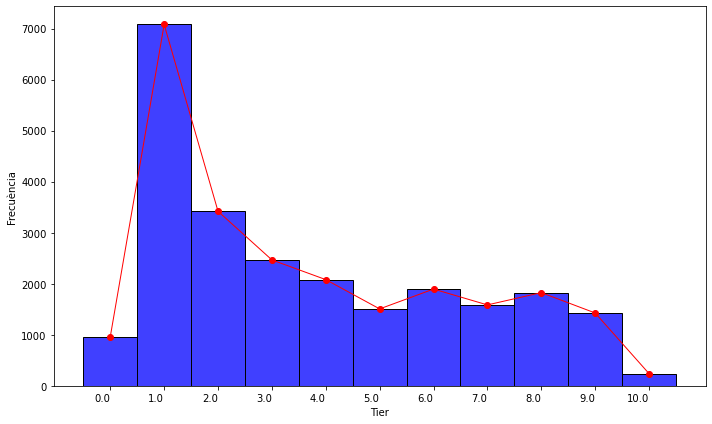

In [54]:
categorical_data = datos['Tier'].dropna() 
categoriasordenadas = sorted(categorical_data.unique())

categorical_data = categorical_data.astype('category')
categorical_data = categorical_data.cat.set_categories(categoriasordenadas, ordered=True)

plt.figure(figsize=(10, 6))
hist_data = sns.histplot(categorical_data, kde=False, color='blue', edgecolor='black', discrete=True)

bin_centers = [patch.get_x() + patch.get_width() / 2 for patch in hist_data.patches]
bin_heights = [patch.get_height() for patch in hist_data.patches]

plt.scatter(bin_centers, bin_heights, color='red', zorder=5)  
plt.plot(bin_centers, bin_heights, color='red', linestyle='-', linewidth=1)  

plt.xlabel('Tier')
plt.ylabel('Frecuència')
plt.xticks(ticks=bin_centers, labels=categoriasordenadas, ha='right')
plt.tight_layout()
plt.show()


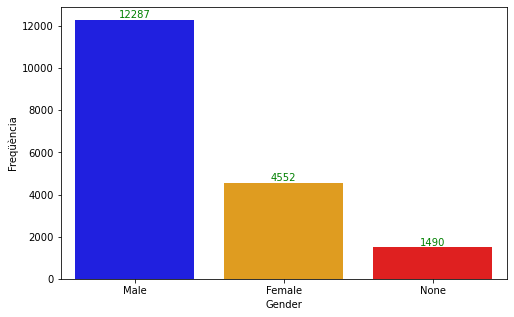

In [55]:
colors = {'Male': 'blue', 'Female': 'orange', 'None': 'red'}

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Gender', data=datos, palette=colors)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='green', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Gender')
plt.ylabel('Freqüència')



plt.show()


Top 10 Superpoders més comuns:
Agility                  11775
Reflexes                 10912
Endurance                10832
Stamina                  10353
Accelerated Healing       8982
Durability                8774
Cold Resistance           8741
Heat Resistance           8660
Master Martial Artist     8635
Weapons Master            8633
dtype: int64


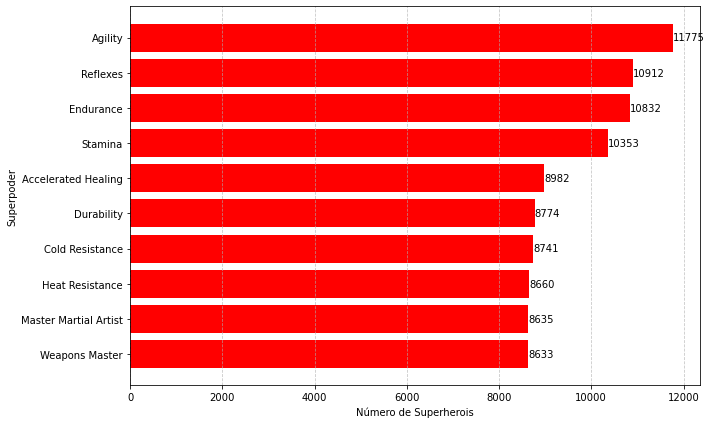

In [56]:

superpowers_dummy = datos['Super_powers'].str.get_dummies(sep=',')
superpowers_counts = superpowers_dummy.sum()
top_10_superpowers = superpowers_counts.sort_values(ascending=False).head(10)

print("Top 10 Superpoders més comuns:")
print(top_10_superpowers)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_superpowers.index[::-1], top_10_superpowers.values[::-1], color='red')


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', ha='left')


plt.xlabel('Número de Superherois')
plt.ylabel('Superpoder')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [57]:
print(superpowers_dummy.shape[1])

486


In [58]:
print(datos.dtypes)


Alignment           object
Character         category
Class_value        float64
Combat             float64
Creator             object
Durability         float64
Gender              object
Intelligence       float64
Level              float64
Power              float64
Species             object
Speed              float64
Speed_velocity     float64
Strength           float64
Strength_force     float64
Super_powers      category
Tier               float64
Universe            object
dtype: object


In [59]:

datos_numericos = datos.select_dtypes(include=['float64'])

print(datos_numericos.corr())



                Class_value    Combat  Durability  Intelligence     Level  \
Class_value        1.000000  0.062369    0.088452      0.085059  0.100434   
Combat             0.062369  1.000000    0.478567      0.462422  0.475194   
Durability         0.088452  0.478567    1.000000      0.529118  0.889222   
Intelligence       0.085059  0.462422    0.529118      1.000000  0.615636   
Level              0.100434  0.475194    0.889222      0.615636  1.000000   
Power              0.075750  0.419712    0.852689      0.513125  0.871569   
Speed              0.080539  0.500007    0.858785      0.541706  0.856895   
Speed_velocity     0.094610  0.422252    0.802667      0.559595  0.831218   
Strength           0.075137  0.469994    0.836441      0.460393  0.798871   
Strength_force     0.088953  0.427097    0.791192      0.502919  0.784588   
Tier               0.139029  0.459675    0.890346      0.584264  0.924908   

                   Power     Speed  Speed_velocity  Strength  Strength_forc

In [60]:
print(datos.isna().sum())

Alignment            0
Character            0
Class_value        179
Combat             179
Creator              0
Durability         179
Gender            6340
Intelligence       179
Level              179
Power              179
Species              0
Speed              179
Speed_velocity     179
Strength           179
Strength_force     179
Super_powers      3142
Tier               179
Universe             0
dtype: int64


In [61]:
datos = datos.dropna(subset=['Gender'])
print(datos.isna().sum())



Alignment            0
Character            0
Class_value          1
Combat               1
Creator              0
Durability           1
Gender               0
Intelligence         1
Level                1
Power                1
Species              0
Speed                1
Speed_velocity       1
Strength             1
Strength_force       1
Super_powers      1345
Tier                 1
Universe             0
dtype: int64


In [62]:

datos = datos.dropna(subset=['Super_powers'])
print(datos.isna().sum())

Alignment         0
Character         0
Class_value       1
Combat            1
Creator           0
Durability        1
Gender            0
Intelligence      1
Level             1
Power             1
Species           0
Speed             1
Speed_velocity    1
Strength          1
Strength_force    1
Super_powers      0
Tier              1
Universe          0
dtype: int64


In [63]:
datos = datos.dropna(subset=['Tier'])
print(datos.isna().sum())

Alignment         0
Character         0
Class_value       0
Combat            0
Creator           0
Durability        0
Gender            0
Intelligence      0
Level             0
Power             0
Species           0
Speed             0
Speed_velocity    0
Strength          0
Strength_force    0
Super_powers      0
Tier              0
Universe          0
dtype: int64


In [64]:
print(datos.shape[0])
print(datos.shape[1])

16983
18


# ANÀLISI ESTADÍSTICA

#### La influència dels poders al gènere

In [65]:
#filtrem Male i Female
datosfiltrados = datos[datos['Gender'].isin(['Male', 'Female'])]

superpowers_dummies = datosfiltrados['Super_powers'].str.get_dummies(sep=',')

#ajuntem
modelogenero = pd.concat([datosfiltrados[['Gender']], superpowers_dummies], axis=1)

#codifiquem
modelogenero['Gender'] = modelogenero['Gender'].map({'Male': 1, 'Female': 0})


X = modelogenero.drop('Gender', axis=1)
y = modelogenero['Gender']

#Sobremostreig
smote = SMOTE(random_state=5998)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=5998)


pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


feature_names = X.columns
coefficients = pipeline.named_steps['logisticregression'].coef_[0]

importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
})



print(y.value_counts())
print(y_resampled.value_counts())

print(pipeline.named_steps['logisticregression'].intercept_[0])


top10superpoders = importance.sort_values(by='AbsCoefficient', ascending=False).head(10)
print(top10superpoders)




              precision    recall  f1-score   support

           0       0.67      0.77      0.72      2265
           1       0.73      0.63      0.68      2282

    accuracy                           0.70      4547
   macro avg       0.70      0.70      0.70      4547
weighted avg       0.70      0.70      0.70      4547

1    11367
0     4215
Name: Gender, dtype: int64
1    11367
0    11367
Name: Gender, dtype: int64
0.2305226917845315
                   Feature  Coefficient  AbsCoefficient
8               Acrobatics    -0.323173        0.323173
174      Hair Manipulation    -0.278466        0.278466
262              New Power     0.249883        0.249883
378        Soul Resistance    -0.249086        0.249086
445              Uni-Power     0.233210        0.233210
274           Omega Effect     0.225865        0.225865
265       Nigh-Omniscience     0.219295        0.219295
351  Regeneration Negation    -0.215014        0.215014
245   Molecular Combustion    -0.198296        0.198

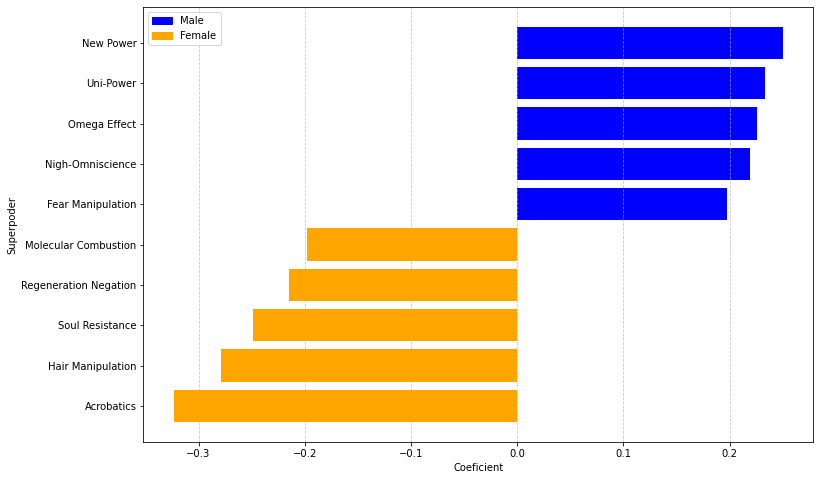

In [66]:
top10superpoders = pd.concat([
    top10superpoders[top10superpoders['Coefficient'] < 0].sort_values(by='Coefficient'),
    top10superpoders[top10superpoders['Coefficient'] > 0].sort_values(by='Coefficient')
])


plt.figure(figsize=(12, 8))


bars = plt.barh(top10superpoders['Feature'], top10superpoders['Coefficient'], 
                color=['blue' if x > 0 else 'orange' for x in top10superpoders['Coefficient']])

plt.xlabel('Coeficient')
plt.ylabel('Superpoder')


plt.grid(axis='x', linestyle='--', alpha=0.7)


blue_patch = mpatches.Patch(color='blue', label='Male')
orange_patch = mpatches.Patch(color='orange', label='Female')
plt.legend(handles=[blue_patch, orange_patch])


plt.show()


In [67]:
mejores = pd.DataFrame(datos['Character'][datos['Tier']==10])
print(mejores.head(50))

                                             Character
1818                                          Beyonder
3375                                   Jubei A.Mercury
3376                                   Jubei A.Mercury
4137                               Lucifer Morningstar
4138                               Lucifer Morningstar
6131                                         The Light
6668        The Being Whom Embody The Essence Of Story
6669        The Being Whom Embody The Essence Of Story
7796                           Vision (House Of Ideas)
8776                                         Akuto Sai
8777                                         Akuto Sai
13345                            Loki (God Of Stories)
13362                                             Luis
13896                                Michael Demiurgos
13897                                Michael Demiurgos
14171                             Nyx (House Of Ideas)
16022                                            Scrat
19419     

In [68]:
print(datos[datos['Character'] == "Spider-Man"])

      Alignment   Character  Class_value  Combat        Creator  Durability  \
15978      Good  Spider-Man       8101.0    80.0  Marvel Comics        70.0   
15979      Good  Spider-Man      13466.0    80.0  Marvel Comics        70.0   
15980      Good  Spider-Man        307.0    25.0  Marvel Comics        30.0   
15981      Good  Spider-Man        392.0    25.0  Marvel Comics        30.0   
15982      Good  Spider-Man        355.0    80.0  Marvel Comics        30.0   
15983      Good  Spider-Man        444.0    80.0  Marvel Comics        30.0   
15992      Good  Spider-Man        121.0    80.0  Marvel Comics        12.0   
15993      Good  Spider-Man        139.0    80.0  Marvel Comics        12.0   
16000      Good  Spider-Man        243.0    80.0  Marvel Comics        30.0   
16001      Good  Spider-Man        289.0    80.0  Marvel Comics        30.0   
16002      Good  Spider-Man        130.0    75.0  Marvel Comics        25.0   
16003      Good  Spider-Man        173.0    75.0  Ma

#### Predicció del Tier dels superherois

1. feature Durability (0.7617300273808485)
2. feature Power (0.09188602074090464)
3. feature Intelligence (0.02451566740843481)
4. feature Speed (0.016327110704079724)
5. feature Strength (0.011585548182616963)
6. feature Combat (0.007179809732992119)
7. feature Super_powers_Nigh-Omnipotence (0.002172005221796467)
8. feature Species_Alien (0.001388272099040656)
9. feature Creator_DC Comics (0.001198103412306401)
10. feature Creator_Other (0.0010984660703730765)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Millor hiperparàmetres {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Mean Squared Error: 0.35472475713865176
R^2 Score: 0.943973210955581


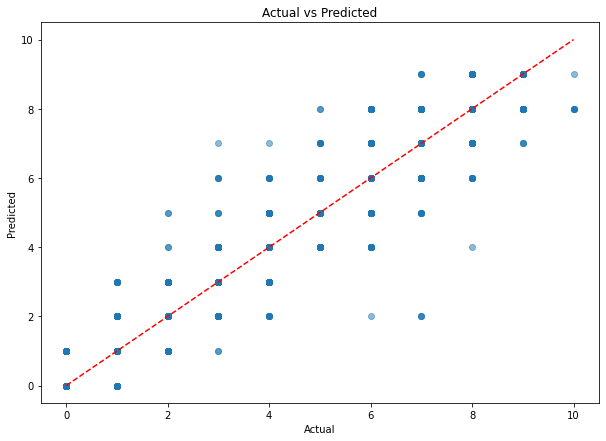

In [69]:

datosregresion = datos.copy()
columnasfuera = ['Class_value','Level','Speed_velocity','Strength_force']

datosregresion = datosregresion.drop(columns=[col for col in columnasfuera if col in datosregresion.columns])

categorical_columns = datosregresion.select_dtypes(include=['object', 'category']).columns.tolist()
binary_columns = [col for col in datosregresion.columns if datosregresion[col].nunique() == 2 and col not in categorical_columns]

datosregresion = pd.get_dummies(datosregresion, columns=categorical_columns)


X = datosregresion.drop(columns=['Tier']) 
y = datosregresion['Tier']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5998)


modelobasico = RandomForestRegressor(n_estimators=100, random_state=5998)
modelobasico.fit(X_train, y_train)


importancies = modelobasico.feature_importances_
indexs = np.argsort(importancies)[::-1]

for i in range(10):
    print(f"{i + 1}. feature {X_train.columns[indexs[i]]} ({importancies[indexs[i]]})")

car = 10

caracteristiques = [X_train.columns[indexs[i]] for i in range(car)]

X_train_selected = X_train[caracteristiques]
X_test_selected = X_test[caracteristiques]


param_grid = {
    'n_estimators': [200, 300,400],
    'max_depth': [10, 20,30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


modelnou = RandomForestRegressor(random_state=5998)


grid_search = GridSearchCV(estimator=modelnou, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train_selected, y_train)


millormodel = grid_search.best_estimator_

y_pred = np.round(millormodel.predict(X_test_selected))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Millor hiperparàmetres", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()



In [70]:
print(datos['Super_powers'][datos['Character'] == 'Spider-Man'])

15978    Acrobatics,Agility,Cold Resistance,Dexterity,E...
15979    Acrobatics,Agility,Cold Resistance,Dexterity,E...
15980    Acrobatics,Agility,Animal Attributes,Animal Or...
15981    Acrobatics,Agility,Animal Attributes,Animal Or...
15982    Acrobatics,Agility,Animal Attributes,Animal Or...
15983    Acrobatics,Agility,Animal Attributes,Animal Or...
15992    Agility,Durability,Endurance,Enhanced Hearing,...
15993    Agility,Durability,Endurance,Enhanced Hearing,...
16000    Acrobatics,Agility,Dexterity,Disguise Mastery,...
16001    Acrobatics,Agility,Dexterity,Disguise Mastery,...
16002    Acrobatics,Agility,Danger Sense,Dexterity,Endu...
16003    Acrobatics,Agility,Danger Sense,Dexterity,Endu...
16004    Durability,Stamina,Super Strength,Wallcrawling...
16005    Durability,Stamina,Super Strength,Wallcrawling...
16027    Acrobatics,Agility,Danger Sense,Dexterity,Dura...
16028    Acrobatics,Agility,Danger Sense,Dexterity,Dura...
16037    Agility,Enhanced Hearing,Intelligence,Reflexes.

1. feature Power (0.07419956554998226)
2. feature Durability (0.07362345167905762)
3. feature Speed (0.05400150274311733)
4. feature Strength (0.05129421482735486)
5. feature Intelligence (0.035538989493704945)
6. feature Combat (0.03301296166474986)
7. feature Species_Human (0.010771554810126278)
8. feature Species_Other (0.0081342495908162)
9. feature Alignment_Good (0.006658499965073033)
10. feature Alignment_Bad (0.00615149296689803)
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Millor hiperparàmetres: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Precisió: 0.8513394171327642
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       120
         1.0       0.95      0.96      0.96      1038
         2.0       0.90      0.91      0.90       538
         3.0       0.86      0.87      0.87       365
         4.0       0.88      0.84      0.86       297
         

C:\Users\manonio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manonio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manonio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


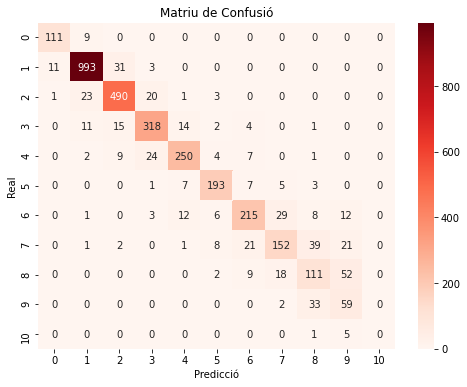

In [71]:
datosclas = datos.copy()
columnasfuera = ['Class_value','Level','Speed_velocity','Strength_force']

datosclas = datosclas.drop(columns=[col for col in columnasfuera if col in datosclas.columns])


categorical_columns = datosclas.select_dtypes(include=['object', 'category']).columns.tolist()
binary_columns = [col for col in datosclas.columns if datosclas[col].nunique() == 2 and col not in categorical_columns]

datosclas = pd.get_dummies(datosclas, columns=categorical_columns)


datosclas['Tier'] = datosclas['Tier'].astype('category')


X_train, X_test, y_train, y_test = train_test_split(datosclas.drop(columns=['Tier']), datosclas['Tier'], test_size=0.2, random_state=5998)


modelinicialclas = RandomForestClassifier(n_estimators=100, random_state=5998)
modelinicialclas.fit(X_train, y_train)

importancies = modelinicialclas.feature_importances_
indexs_clas = np.argsort(importancies)[::-1]


for i in range(10):
    print(f"{i + 1}. feature {X_train.columns[indexs_clas[i]]} ({importancies[indexs_clas[i]]})")

num_caracteristicas_seleccionadas = 10

caracteristicas_seleccionadas = [X_train.columns[indexs_clas[i]] for i in range(num_caracteristicas_seleccionadas)]

X_train_seleccionadas = X_train[caracteristicas_seleccionadas]
X_test_seleccionadas = X_test[caracteristicas_seleccionadas]

parametros_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


model_rf_clas = RandomForestClassifier(random_state=5998)


grid_clas = GridSearchCV(estimator=model_rf_clas, param_grid=parametros_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_clas.fit(X_train_seleccionadas, y_train)


millormodclas = grid_clas.best_estimator_


y_pred_clas = millormodclas.predict(X_test_seleccionadas)


precision_clas = accuracy_score(y_test, y_pred_clas)
print("Millor hiperparàmetres:", grid_clas.best_params_)
print("Precisió:", precision_clas)



print(classification_report(y_test, y_pred_clas))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_clas), annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()
